
fmin完整的调用形式是：

fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None)

不过我们最常使用的就是前两个参数。一个描述优化问题的函数以及初值。后面的那些参数我们也很容易理解。如果您能用到，请自己研究。下面研究一个最简单的问题，来感受这个函数的使用方法：f(x)=x**2-4*x+8，我们知道，这个函数的最小值是4，在x=2的时候取到。

from scipy.optimize import fmin    #引入优化包
def myfunc(x):
        return x**2-4*x+8    #定义函数
   
x0 = [1.3]    #猜一个初值 
xopt = fmin(myfunc, x0)    #求解
print xopt    #打印结果

运行之后，给出的结果是：

Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 16
         Function evaluations: 32
[ 2.00001953]

In [1]:
from scipy.optimize import fmin

In [2]:
def myfunc(x):
    return x**2 - 4*x + 8
x0 = [1.0]

xopt = fmin(myfunc, x0)


Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 17
         Function evaluations: 34


In [3]:
print(xopt)

[ 2.]


除了fmin_ncg必须提供梯度信息外，其他几个函数的调用大同小异，完全类似。我们不妨做一个对比：

from scipy.optimize import fmin,fmin_powell,fmin_bfgs,fmin_cg

可通过来查看具体参数：help(fmin)

In [5]:
from scipy.optimize import fmin, fmin_powell, fmin_bfgs, fmin_cg

In [7]:
def myfunc(x):
        return x**2-4*x+8
   
x0 = [1.3] 
xopt1 = fmin(myfunc, x0)
print(xopt1)
print
xopt2 = fmin_powell(myfunc, x0)
print(xopt2)
print
xopt3 = fmin_bfgs(myfunc, x0)
print(xopt3)
print
xopt4 = fmin_cg(myfunc,x0)
print(xopt4)

Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 16
         Function evaluations: 32
[ 2.00001953]
Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 2
         Function evaluations: 53
1.9999999999683615
Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 3
[ 1.99999999]
Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[ 1.99999999]


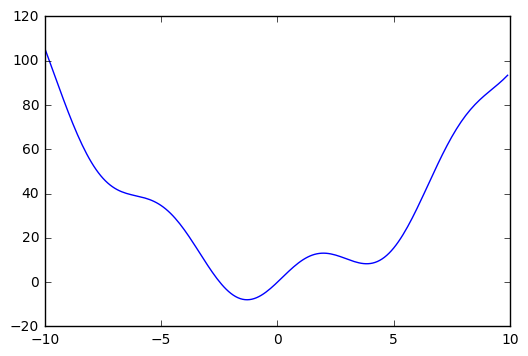

In [11]:
from scipy import optimize
import numpy as np
import pylab as plt

def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

optimize.fmin_bfgs(f, 0)

This function has a global minimum around -1.3 and a local minimum around 3.8.

## The six-hump camelback function
$f(x, y) = (4 - 2.1x^2 + \frac{x^4}{3})x^2 + xy + (4y^2 - 4)y^2$
has multiple global and local minima. Find the global minima of this function.

Hints:
Variables can be restricted to -2 < x < 2 and -1 < y < 1.
Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
Use scipy.optimize.fmin_bfgs() or another multi-dimensional minimizer.
How many global minima are there, and what is the function value at those points? What happens for an initial guess of (x, y) = (0, 0) ?

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

# plt.figure()  # simple visualization for use in tutorial
# plt.imshow(sixhump([xg, yg]))
# plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show() 

optimize.fmin_bfgs(sixhump, [1,0])

ImportError: No module named numpy

栗子：
约束：w[0]+w[1]+w[2]=1
     0<w[i]<1, i=1,2,3
min:     
    

In [3]:
import numpy as np
from scipy import optimize as opt

a = np.array([3,2,2])

v1 = np.array([1,1,1])
v2 = np.array([2,1,1])
v3 = np.array([1,1,3])
v = np.array([v1,v2,v3])
v = np.transpose(v) 


w = np.array([0.8,0.1,0.1]).reshape(1,-1)
w =np.transpose(w)


def f(x):
    y = (a - np.dot(v,x))**2
    return np.sum(y)

def g(x):
    return x[0]+x[1]+x[2]-1


constraints = [dict(type='eq', fun=g)] # 约束采用字典定义，约束方式为等式约束，边界用 g 表示
x_cons_opt = opt.minimize(f, [w], method='SLSQP', constraints=constraints, bounds=[(0,1),(0,1),(0,1)]).x

print(x_cons_opt)

[ 0.          0.80000004  0.19999996]


In [141]:
v3 = np.array([1,1,3])
v3**2

array([1, 1, 9])

In [ ]:
x.shape=(5,1)  
y=transpose(x) 

约束条件：
x[0]+x[1]+[x2]=1
0=<x[0]<=1
0=<x[1]<=1
0=<x[2]<=1

In [124]:
from scipy import optimize as opt

def f(x):
    return 2*x[0]+2*x[1]**2+3*x[2]

def g(x):
    return x[0]+x[1]+x[2]-1


constraints = [dict(type='eq', fun=g)] # 约束采用字典定义，约束方式为不等式约束，边界用 g 表示
x_cons_opt = opt.minimize(f, (0, 0, 1), method='SLSQP', constraints=constraints, bounds=[(0,1),(0,1),(0,1)]).x


print(x_cons_opt)


[  4.99999999e-01   5.00000001e-01   3.95516953e-16]


In [126]:
from scipy import optimize as opt
import numpy as np
import pylab as plt

def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2

def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**2

def h(x):
    return x[1]-x[0]

x_opt = opt.minimize(f, (0, 0), method='BFGS').x
constraints = [dict(type='ineq', fun=h)] # 约束采用字典定义，约束方式为不等式约束，边界用 g 表示
x_cons_opt = opt.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x

print(x_cons_opt)

[ 1.  1.]


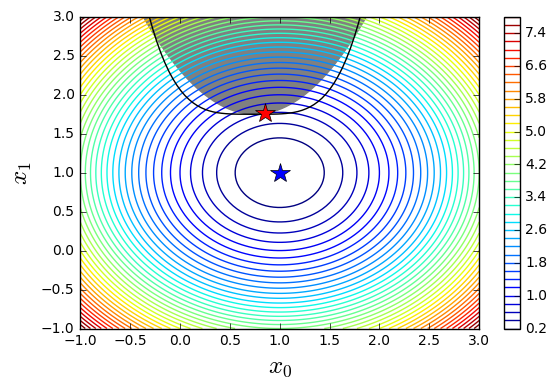

In [105]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f((X, Y)), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15) # 蓝色星星，没有约束下的最小值

ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**2, 3, color="grey")
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15) # 在区域约束下的最小值

ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()
plt.show() 